## Домашнее задание. День 7

### Задача 1. ТОП-3 среди кредитных экспертов

Сценарий: В прошлом месяце был объявлен конкурс лучший Кредитный эксперт со следующими критериями:
1. Прирост кредитного портфеля на 20%
2. Доля клиентов женского пола в портфеле не менее 20%
3. Доля просрочек 10 дней и более (PAR 10+)  меньше 1%
4. Наличие не менее 10 лояльных клиентов (ступень кредита >3)
5. Наличие проектных кредитов
   
Первое место с максимальными показателями получить 5000 сомони , 2-е место - 3000 и 3-е 1000 сом.

Определите 3 победилей конкурса, анализируя данные текущего месяца и прошлого.

#### Loading datasets and imports

In [201]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)


In [9]:
# NOTE: Незабудьте поменять пути к файлам
cur_path = r"D:\HR\Python Courses\2024\DataSet\12Активные кредиты 31.12.20X6.xlsx"
prev_path = r"D:\HR\Python Courses\2024\DataSet\10Активные кредиты 31.10.20X6.xlsx"


In [202]:
prev = pd.read_excel(prev_path, header=3)
prev.head()

,№,Филиал,Подразделение,Кредитный эксперт,Наименования группа,№ договора,Дата выдачи,Дата окончание действия договора,Валюта,Выданная сумма,Активная сумма,Активная сумма в нац. валюте,Количество дней просрочки,Рег. номер клиента,Количество траншей,Категория кредита,Ступень кредита,Пол,Ежемесячный доход семьи,Ежемесячный расход семьи,Дата рождения клиента,Сектор (Вид деятельности),Подсектор (Вид деятельности),Объект кредитования,Проект
0,1,Филиал в г. Душанбе,001-01,Кредитный эксперт 68,NaN,C/001-01/120409-004,2016-05-12,2017-05-12,TJS,"4,000,000.00","2,587,000.00","2,587,000.00",0,120409,12,Необеспеченный,4,Женский,"1,032.00",350.00,1965-04-15 00:00:00,Истеъмолот,Истеъмолот,Ба кормандони давлати(маош),NaN
1,2,Филиал в г. Душанбе,001-01,Кредитный эксперт 72,NaN,C/001-01/137537-002,2016-05-12,2017-11-13,TJS,"5,000,000.00","3,948,190.00","3,948,190.00",0,137537,18,Обеспеченный,2,Женский,"2,000.00",700.00,1966-09-03 00:00:00,Сохибкори,Хизматрасони,Хизматрасони дузандаги,NaN
2,3,Филиал в г. Душанбе,001-01,Кредитный эксперт 77,NaN,C/001-01/99047-003,2016-05-13,2017-05-15,TJS,"1,500,000.00","968,290.00","968,290.00",0,99047,12,Необеспеченный,3,Женский,"1,800.00",900.00,1978-01-10 00:00:00,Истеъмолот,Истеъмолот,Ба кормандони давлати(маош),NaN
3,4,Филиал в г. Душанбе,001-01,Кредитный эксперт 22,NaN,C/001-01/145826-001,2016-03-11,2017-03-13,USD,"1,800,000.00","822,390.00","6,476,570.00",0,145826,12,Обеспеченный,1,Мужской,"5,000.00","1,500.00",1966-04-15 00:00:00,Сохибкори,Хариду фуруш,Махсулоти либосвори,NaN
4,5,Филиал в г. Душанбе,001-01,Кредитный эксперт 57,NaN,C/001-01/989864-007,2016-04-29,2018-11-29,USD,"4,542,000.00","4,016,940.00","31,634,610.00",0,989864,31,Обеспеченный,5,Мужской,0.00,0.00,1981-03-03 00:00:00,Истеъмолот,Истеъмолот,Ба кормандони ташкилоти тичорати(маош),NaN


In [203]:
current = pd.read_excel(cur_path, header=3) 
current.head()

,№,Филиал,Подразделение,Кредитный эксперт,Наименования группа,№ договора,Дата выдачи,Дата окончание действия договора,Валюта,Выданная сумма,Активная сумма,Активная сумма в нац. валюте,Количество дней просрочки,Рег. номер клиента,Количество траншей,Категория кредита,Ступень кредита,Пол,Ежемесячный доход семьи,Ежемесячный расход семьи,Дата рождения клиента,Сектор (Вид деятельности),Подсектор (Вид деятельности),Объект кредитования,Проект
0,1,Филиал в г. Душанбе,001-01,Кредитный эксперт 69,NaN,C/001-01/117493-004,2016-12-14,2017-12-14,TJS,"5,000,000.00","5,000,000.00","5,000,000.00",0,117493,12,Необеспеченный,4,Мужской,"1,500.00",600.00,1991-08-29 00:00:00,Истеъмолот,Истеъмолот,Ба сохибкорони сохаи хизматрасони,NaN
1,2,Филиал в г. Душанбе,001-01,Кредитный эксперт 50,Абуали-Варзоб,C/001-01/162315-001,2016-12-15,2017-12-15,TJS,"3,000,000.00","3,000,000.00","3,000,000.00",0,162315,12,Необеспеченный,1,Женский,"2,400.00",900.00,1982-06-05 00:00:00,Хочагии кишлок,Чорвопарвари,Зиёд кардани саршумор,NaN
2,3,Филиал в г. Душанбе,001-01,Кредитный эксперт 93,Хандон-Варзоб,C/001-01/162316-001,2016-12-15,2017-12-15,TJS,"3,000,000.00","3,000,000.00","3,000,000.00",0,162316,12,Необеспеченный,1,Женский,"2,000.00",800.00,1977-04-10 00:00:00,Сохибкори,Хизматрасони,Хизматрасони дузандаги,NaN
3,4,Филиал в г. Душанбе,001-01,Кредитный эксперт 70,NaN,C/001-01/98946-004,2016-12-16,2018-12-17,TJS,"78,000,000.00","78,000,000.00","78,000,000.00",0,98946,24,Обеспеченный,4,Женский,"8,500.00","2,000.00",1979-01-02 00:00:00,Хочагии кишлок,Чорвопарвари,Нигохубин ва парвариш,NaN
4,5,Филиал в г. Душанбе,001-01,Кредитный эксперт 16,NaN,C/001-01/162533-001,2016-12-16,2018-12-17,TJS,"25,000,000.00","25,000,000.00","25,000,000.00",0,162533,24,Обеспеченный,1,Женский,"3,500.00","1,000.00",1992-02-21 00:00:00,Сохибкори,Хариду фуруш,Махсулоти хуроквори,NaN


#### 1.1. Прирост кредитного портфеля на 20%

In [68]:
# Портфель по кредитному эксперту на 31.10.20X6
lo_prv_portfolio = prev.groupby('Кредитный эксперт') \
                         .agg({'Активная сумма в нац. валюте':'sum'}) \
                         .rename(columns={'Активная сумма в нац. валюте': 'prev_port'})

# Портфель по кредитному эксперту на 31.12.20X6
lo_cur_portfolio = current.groupby('Кредитный эксперт') \
                         .agg({'Активная сумма в нац. валюте':'sum'}) \
                         .rename(columns={'Активная сумма в нац. валюте': 'cur_port'})

# Объединение портфелей с методом inner
# В результате останутся только те кредитные эксперты, которые есть в обоих портфелях
# где исключаем КЭ-ов которые уволились или пришли после 31.10.20X6
port_trend =  lo_prv_portfolio.merge(lo_cur_portfolio, how='inner', on='Кредитный эксперт')

# Расчет изменения портфеля
port_trend['change'] = port_trend['cur_port'] / port_trend['prev_port']

# Портфель увеличился более чем на 20%
port_trend['pass'] = port_trend['change'] >= 1.20

# Выводим только тех кредитных экспертов, у которых портфель увеличился более чем на 20%
port_trend = port_trend[port_trend['pass']]

# Сортируем по убыванию, чтобы вверху были те, у кого портфель увеличился больше всего
port_trend.sort_values(by='change', ascending=False, inplace=True)

# далее присваеваем индекс, как показатель оценки, где 1 самый лучший
port_trend['rank'] = range(1, port_trend.shape[0]+1)
port_trend.head()

,prev_port,cur_port,change,pass,rank
Кредитный эксперт,,,,,
Кредитный эксперт 35,"1,449,614,320.00","2,375,693,380.00",1.64,True,1
Кредитный эксперт 44,"1,260,820,640.00","2,040,260,070.00",1.62,True,2
Кредитный эксперт 94,"1,474,918,360.00","2,143,328,150.00",1.45,True,3
Кредитный эксперт 19,"1,539,163,980.00","2,159,204,540.00",1.40,True,4
Кредитный эксперт 50,"1,463,582,860.00","1,934,310,170.00",1.32,True,5


#### 1.2. Доля клиентов женского пола в портфеле не менее 20%

In [71]:
# Расчет доли женщин в портфеле (в %)
# за основу возьмем данные текущего периода

gender = current.pivot_table(index='Кредитный эксперт', 
                                            columns='Пол', 
                                            values='Активная сумма в нац. валюте', 
                                            aggfunc='sum', 
                                            fill_value=0
                                            )

# Формула расчета доли женщин в портфеле: 
# (сумма активов по женщинам / общая сумма активов)

# общая сумма
gender['общая сумма'] = gender['Женский'] + gender['Мужской']

# Расчет доли женщин в портфеле
gender['share'] = gender['Женский'] / gender['общая сумма']

# Прошли ли кредитные эксперты порог в 20%?
gender['pass'] = gender['share'] > 0.2

# Выводим только тех кредитных экспертов, у которых доля женщин в портфеле более 20%
gender = gender[gender['pass']]

# Сортируем по убыванию, чтобы вверху были те, у кого доля женщин в портфеле больше всего
gender.sort_values(by='share', ascending=False, inplace=True)

# далее присваеваем индекс, как показатель оценки, где 1 самый лучший
gender['rank'] = range(1, gender.shape[0]+1)
gender.head()

Пол,Женский,Мужской,общая сумма,share,pass,rank
Кредитный эксперт,,,,,,
Кредитный эксперт 97,"893,782,030.00","910,769,400.00","1,804,551,430.00",0.50,True,1
Кредитный эксперт 4,"622,518,400.00","674,867,560.00","1,297,385,960.00",0.48,True,2
Кредитный эксперт 87,"793,208,790.00","890,852,320.00","1,684,061,110.00",0.47,True,3
Кредитный эксперт 53,"775,146,530.00","879,274,090.00","1,654,420,620.00",0.47,True,4
Кредитный эксперт 12,"800,357,910.00","923,135,980.00","1,723,493,890.00",0.46,True,5


#### 1.3. Доля просрочек 10 дней и более (PAR 30+)  меньше 5%


In [73]:
# классифицируем просрочки, за основу возьмем данные текущего периода
current['par10'] = current['Количество дней просрочки'].map(lambda x: 'до 30 дней' if x <= 30 else 'более 30 дней')

# групируем данные по кредитному эксперту и считаем портфель просрочек
par = current.pivot_table(index='Кредитный эксперт', 
                        columns='par10', 
                        values='Активная сумма в нац. валюте', 
                        aggfunc='sum', 
                        fill_value=0
                        )

# Находим общую сумму просрочек
par['общая сумма'] = par['более 30 дней'] + par['до 30 дней']

# Расчет доли просрочек более 10 дней
par['share'] = par['более 30 дней'] / par['общая сумма']

# Прошли ли кредитные эксперты порог?
par['pass'] = par['share'] < 0.05

par = par[par['pass']]

# Сортируем по возрастанию, чтобы вверху были те, у кого доля просрочек меньше всего
par.sort_values(by='share', ascending=True, inplace=True)

# далее присваеваем индекс, как показатель оценки, где 1 самый лучший
par['rank'] = range(1, par.shape[0]+1)

par.head()


par10,более 30 дней,до 30 дней,общая сумма,share,pass,rank
Кредитный эксперт,,,,,,
Кредитный эксперт 33,"25,201,920.00","1,391,828,510.00","1,417,030,430.00",0.02,True,1
Кредитный эксперт 80,"44,278,720.00","1,833,067,120.00","1,877,345,840.00",0.02,True,2
Кредитный эксперт 82,"46,304,560.00","1,814,891,720.00","1,861,196,280.00",0.02,True,3
Кредитный эксперт 98,"52,445,340.00","1,765,768,220.00","1,818,213,560.00",0.03,True,4
Кредитный эксперт 97,"52,127,220.00","1,752,424,210.00","1,804,551,430.00",0.03,True,5


#### 1.4. Наличие не менее 10 лояльных клиентов (ступень кредита >3)


In [74]:
# Предположим, что клиент лояльный, если он взял кредит 3 раза и более
# за основу возьмем данные текущего периода

# классифицируем клиентов
current['loyal'] = current['Ступень кредита'].map(lambda x: 'лояльный' if x >= 3 else 'новый')

# групируем данные по кредитному эксперту и считаем портфель лояльных клиентов
loyal = current.pivot_table(index='Кредитный эксперт', 
                        columns='loyal', 
                        values='Активная сумма в нац. валюте', 
                        aggfunc='count', # <<<<------ нам нужно посчитать количество клиентов 
                        fill_value=0
                        )

# проверяем условие 
loyal['pass'] = loyal['лояльный'] >= 3

# Выводим только тех кредитных экспертов, у которых количество лояльных клиентов более 3
loyal = loyal[loyal['pass']]

# Сортируем по убыванию, чтобы вверху были те, у кого количество лояльных клиентов больше всего
loyal.sort_values(by='лояльный', ascending=False, inplace=True)

# далее присваеваем индекс, как показатель оценки, где 1 самый лучший
loyal['rank'] = range(1, loyal.shape[0]+1)

loyal.head()


loyal,лояльный,новый,pass,rank
Кредитный эксперт,,,,
Кредитный эксперт 17,128,210,True,1
Кредитный эксперт 63,128,238,True,2
Кредитный эксперт 68,125,235,True,3
Кредитный эксперт 67,123,229,True,4
Кредитный эксперт 78,121,236,True,5


#### 1.5. Наличие проектных кредитов

In [75]:
# Предположим, что если у КЭ есть хотя бы один клиент с проектным кредитом, то он прошел порог

# классифицируем кредиты
# Пояснение: если в столбце 'Проект' есть значение, то это проектный кредит
# notna - метод, который возвращает True, если значение не Пустое
# map - метод, который применяет функцию к каждому элементу столбца,
#       то есть если x=True, то возвращаем 'проектный', иначе 'стандартный' 
# Можно использовать другие методы, например, replace, apply и т.д.
current['project'] =current['Проект'].notna().map(lambda x: 'проектный' if x else 'стандантный')

# групируем данные по кредитному эксперту и считаем портфель проектных кредитов
project = current.pivot_table(index='Кредитный эксперт', 
                        columns='project', 
                        values='Активная сумма в нац. валюте', 
                        aggfunc='count', 
                        fill_value=0
                        )

# проверяем условие
project['pass'] = project['проектный'] > 0

# Выводим только тех кредитных экспертов, у которых есть хотя бы один проектный кредит
project = project[project['pass']]

# Сортируем по убыванию, чтобы вверху были те, у кого количество проектных кредитов больше всего
project.sort_values(by='проектный', ascending=False, inplace=True)

# далее присваеваем индекс, как показатель оценки, где 1 самый лучший
project['rank'] = range(1, project.shape[0]+1)

project.head()

project,проектный,стандантный,pass,rank
Кредитный эксперт,,,,
Кредитный эксперт 99,24,300,True,1
Кредитный эксперт 47,22,341,True,2
Кредитный эксперт 53,20,309,True,3
Кредитный эксперт 72,19,335,True,4
Кредитный эксперт 5,19,310,True,5


#### Результаты конкурса

In [77]:
# Объединяем все результаты в одну таблицу
# Можно использовать метод merge, но цепочка будет длиной и неудобной
# т.е. df1.merge(df2).merge(df3).merge(df4) и т.д.

# Поэтому используем метод concat, который объединяет таблицы по индексу
# так же от каждого условия мы берем только столбцы 'rank' и переименовываем их
# чтобы в итоговой таблице было понятно, что это за условие

# NOTE: как выбор колонки мы указываем список, чтобы получиться DataFrame, а не Series

final = pd.concat([
    port_trend[['rank']].rename(columns={'rank': 'portfolio_score'}),   # Условие 1
    gender[['rank']].rename(columns={'rank': 'women_score'}),           # Условие 2
    par[['rank']].rename(columns={'rank': 'par_score'}),                # Условие 3
    loyal[['rank']].rename(columns={'rank': 'loyal_score'}),            # Условие 4
    project[['rank']].rename(columns={'rank': 'project_score'})         # Условие 5
], axis=1, sort=False)

final
    

,portfolio_score,women_score,par_score,loyal_score,project_score
Кредитный эксперт,,,,,
Кредитный эксперт 35,1.00,29,NaN,25,9
Кредитный эксперт 44,2.00,90,10.00,24,94
Кредитный эксперт 94,3.00,96,11.00,37,37
Кредитный эксперт 19,4.00,100,NaN,27,44
Кредитный эксперт 50,5.00,49,NaN,6,13
...,...,...,...,...,...
Кредитный эксперт 55,NaN,94,NaN,40,91
Кредитный эксперт 54,NaN,95,NaN,78,87
Кредитный эксперт 24,NaN,97,NaN,53,60


In [83]:
"""
Внимание вы можете увидеть  что некоторые поля имеют значение NaN, 
это связано с тем что не все КЭ прошли все условия

Например, Кредитный эксперт 35 занял 1 место  по приросту портфеля,
но он не прошел условие по доле PAR30+ в портфеле.

Соответственно, вам нужно убрать такие строки, используйте метод dropna.
тоесть если в строке есть хотя бы одно значение NaN, то исключаем КЭ из списка.

PS. Кстати это тип "Строка" которую мы использовали как пример длинного коментария в Python :)
"""
final = final.dropna(how='any')
final

,portfolio_score,women_score,par_score,loyal_score,project_score
Кредитный эксперт,,,,,
Кредитный эксперт 44,2.00,90,10.00,24,94
Кредитный эксперт 94,3.00,96,11.00,37,37
Кредитный эксперт 82,9.00,83,3.00,73,47
Кредитный эксперт 97,18.00,1,5.00,89,75


In [84]:
"""
Для того чтобы получить итоговую оценку, нужно сложить все значения в строке
и кто получит меньше всего, тот и будет лучшим КЭ

Пояснения: Так как мы утвердили что 1 - самый лучший результат, то сумма ближе к 1 
будет означать что КЭ лучше всего выполнил все условия
"""
final['total_score'] = final.sum(axis=1)
final.sort_values(by='total_score', ascending=True, inplace=True)

# Выводим победителей, топ 3 лучших
final.head(3)

,portfolio_score,women_score,par_score,loyal_score,project_score,total_score
Кредитный эксперт,,,,,,
Кредитный эксперт 94,3.00,96,11.00,37,37,184.00
Кредитный эксперт 97,18.00,1,5.00,89,75,188.00
Кредитный эксперт 82,9.00,83,3.00,73,47,215.00


### Задача 2. Подсчет средних показателей для скоринговой системы кредитования

Сценарий: При построении модели для скоринга кредитов, группа аналитиков столкнулась с проблемой некачественного ввода данных.
Требуется проанализировать средние показатели по следующим полям:
1. Ежемесячный доход семьи
2. Ежемесячный расход семьи
3. Дата рождения клиента

При подсчете средних показателей, необходимо учитывая информацию о регионе/ филиале и гендоре клиента.

In [ ]:
# !pip install matplotlib

In [105]:
"""
План действий:
некачественным вводом данным считается пустые значения, нули и нереально большие значения

Решение: заменить такие значения на средние или медианные значения популяции 
    Используем правило 5% и 95% Процентиль, чтобы исключить выбросы

WIKI: 
Процентиль — это значение, которое делят упорядоченное множество на 100 равных частей.

Использование 5% и 95% процентиля позволяет определить нижнюю и верхнюю границы для исключения выбросов. 
Значения, которые находятся ниже 5% квантиля или выше 95% процентиля, считаются выбросами 
и могут быть исключены из анализа данных.
"""
# Например, у нас есть следующая выборка
li =  [1,3,4,1,2,5,5,2,3,4]
print('Выборка:', li)
# Сортируем выборку
li.sort()
print('Отсортированная выборка:', li)

# Находим 5% и 95% процентиль
p5 = li[int(len(li)*0.05)]
p95 = li[int(len(li)*0.95)]

print('5% процентиль:', p5)
print('95% процентиль:', p95)

print(f"""
    Если наша выборка это зарплаты 
    то мы можем сказать что 5% людей получают меньше чем - "{p5}"
    а 95% людей получают меньше чем - "{p95}"
""")

Выборка: [1, 3, 4, 1, 2, 5, 5, 2, 3, 4]
Отсортированная выборка: [1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
5% процентиль: 1
95% процентиль: 5

    Если наша выборка это зарплаты 
    то мы можем сказать что 5% людей получают меньше чем - "1"
    а 95% людей получают меньше чем - "5"



#### 2.1. Ежемесячный доход семьи


Мы видим что 5% людей получают меньше чем - "0.0"
В то время как 95% людей получают меньше чем - "4000.0"

Также мы видим что минимальное значение - "0.0"
Максимальное значение - "277118.0"

Если клиент получал бы меньше 5% процентиля (0.0 сомони), то кредит ему выдали так как клиент рискованный
так же если клиент получал бы больше 95% процентиля (4000.0 сомони), то ему просто не нужен кредит так как он богатый

Соответственно, мы можем заменить все значения меньше 5% процентиля и больше 95% на среднее значение - "1975.13"



<Axes: title={'center': 'Ежемесячный доход семьи'}, ylabel='Frequency'>

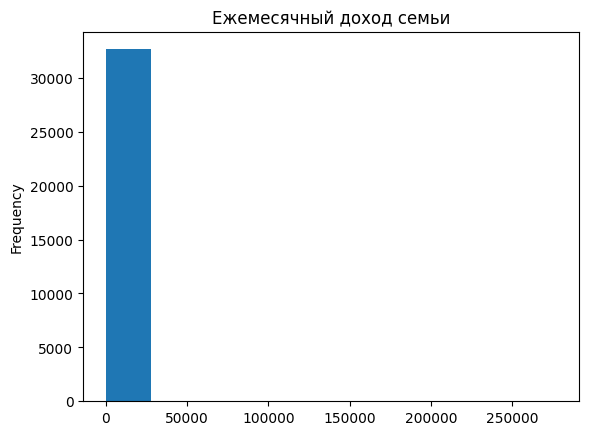

In [217]:
df_copy = current.copy()
# Сохраняем название столбца, для удобства чтобы каждый раз не писать его вручную
target_col = 'Ежемесячный доход семьи'
new_col = 'Ежемесячный доход семьи (очищенный)'

# Найдем 5% и 95% процентиль
p5 = df_copy[target_col].quantile(0.05)
p95 = df_copy[target_col].quantile(0.95)

min_val = df_copy[target_col].min()
max_val = df_copy[target_col].max()
ave_val = round(df_copy[target_col].mean(),2)

print(f"""
Мы видим что 5% людей получают меньше чем - "{p5}"
В то время как 95% людей получают меньше чем - "{p95}"

Также мы видим что минимальное значение - "{min_val}"
Максимальное значение - "{max_val}"

Если клиент получал бы меньше 5% процентиля ({p5} сомони), то кредит ему выдали так как клиент рискованный
так же если клиент получал бы больше 95% процентиля ({p95} сомони), то ему просто не нужен кредит так как он богатый

Соответственно, мы можем заменить все значения меньше 5% процентиля и больше 95% на среднее значение - "{ave_val}"
""")
df_copy[target_col].plot(kind='hist', title=target_col)


<Axes: title={'center': 'Ежемесячный доход семьи (очищенный)'}, ylabel='Frequency'>

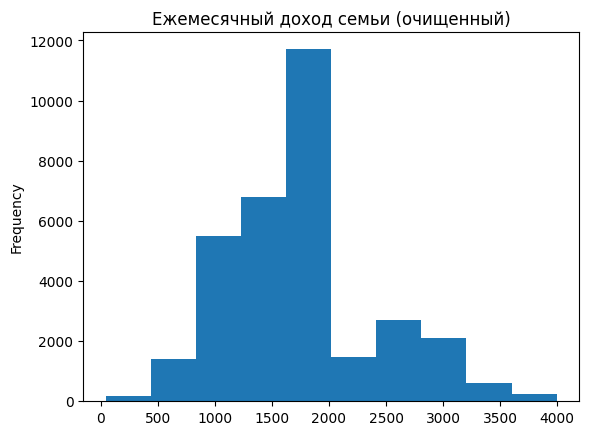

In [218]:
# Заменяем значения меньше 5% процентиля и больше 95% процентиля на среднее значение
df_copy[new_col] = df_copy[target_col].map(lambda x: ave_val if x <= p5 or x>= p95 or pd.isna(x) else x)

# Проверяем, что получилось
df_copy[new_col].plot(kind='hist', title=new_col)

#### 2.2. Ежемесячный расход семьи


Мы видим что 5% людей расходуют меньше чем - "0.0"
В то время как 95% людей расходуют меньше чем - "1500.0"

Также мы видим что минимальное значение - "0.0"
Максимальное значение - "10401795.0"

Соответственно, мы можем заменить все значения меньше 5% процентиля и больше 95% на среднее значение - "1322.28"



<Axes: title={'center': 'Ежемесячный расход семьи'}, ylabel='Frequency'>

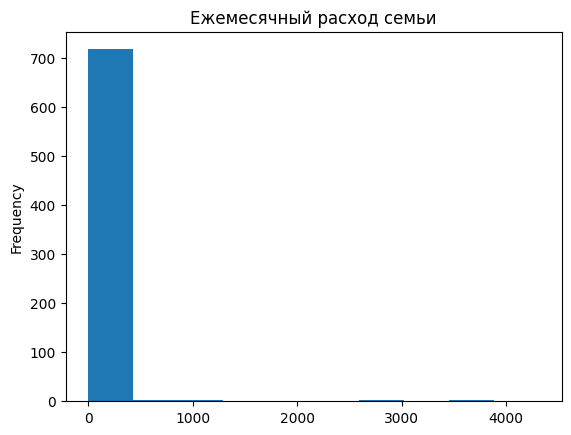

In [219]:
# Сохраняем название столбца, для удобства чтобы каждый раз не писать его вручную
target_col = 'Ежемесячный расход семьи'
new_col = 'Ежемесячный расход семьи (очищенный)'

# Найдем 5% и 95% процентиль
p5 = df_copy[target_col].quantile(0.05)
p95 = df_copy[target_col].quantile(0.95)

min_val = df_copy[target_col].min()
max_val = df_copy[target_col].max()
ave_val = round(df_copy[target_col].mean(),2)

print(f"""
Мы видим что 5% людей расходуют меньше чем - "{p5}"
В то время как 95% людей расходуют меньше чем - "{p95}"

Также мы видим что минимальное значение - "{min_val}"
Максимальное значение - "{max_val}"

Соответственно, мы можем заменить все значения меньше 5% процентиля и больше 95% на среднее значение - "{ave_val}"
""")

df_copy[target_col].value_counts().plot(kind='hist', title=target_col, )

<Axes: title={'center': 'Ежемесячный расход семьи (очищенный)'}, ylabel='Frequency'>

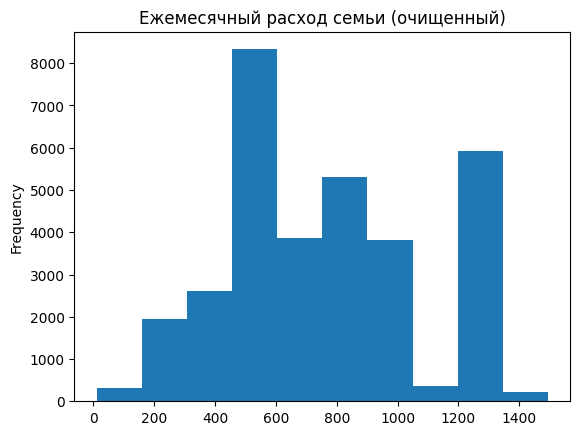

In [220]:
# Заменяем значения меньше 5% процентиля и больше 95% процентиля на среднее значение
df_copy[new_col] = df_copy[target_col].map(lambda x: ave_val if x <= p5 or x>= p95 or pd.isna(x) else x)

# Проверяем, что получилось
df_copy[new_col].plot(kind='hist', title=new_col)

#### 2.3. Дата рождения клиента


Мы видим что 5% людей в возрасте - "30.0"
В то время как 95% людей в возрасте - "67.0"

Также мы видим что минимальное значение - "-41.0"
Максимальное значение - "243.0"

Соответственно, мы можем заменить все значения меньше 5% процентиля и больше 95% на среднее значение - "47.42"

Ноооооо мы забыли про влияние региона/филиала и пола на возраст :)



<Axes: title={'center': 'Возраст'}, ylabel='Frequency'>

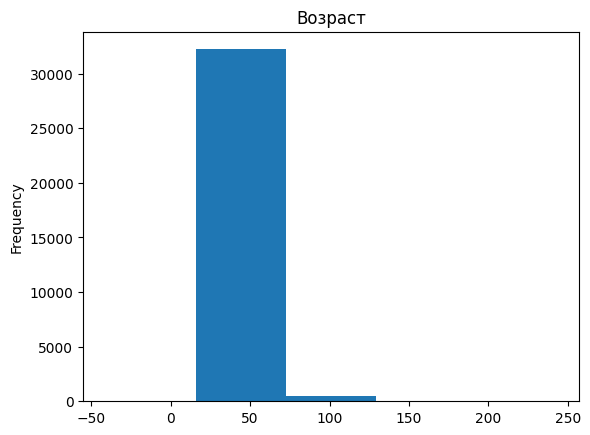

In [221]:
# тут подвох в задании, дату рождения нельзя очистить, 
# но мы можем посчитать возраст клиента и заменить дату рождения на возраст

# Считаем возраст клиента, для этого нужно от текущей даты отнять дату рождения
# NOTE: привильне рассчитать возраст на дату отчета, а не на текущую дату, но для простоты мы используем текущую дату
from datetime import datetime
target_col = 'Возраст'
new_col = 'Возраст (очищенный)'

# конвертируем дату рождения в формат datetime
df_copy['Дата рождения'] = pd.to_datetime(df_copy['Дата рождения клиента'], errors='coerce')

df_copy[target_col] = (datetime.now() - df_copy['Дата рождения']).dt.days // 365


# Найдем 5% и 95% процентиль
p5 = df_copy[target_col].quantile(0.05)
p95 = df_copy[target_col].quantile(0.95)

min_val = df_copy[target_col].min()
max_val = df_copy[target_col].max()
ave_val = round(df_copy[target_col].mean(),2)

print(f"""
Мы видим что 5% людей в возрасте - "{p5}"
В то время как 95% людей в возрасте - "{p95}"

Также мы видим что минимальное значение - "{min_val}"
Максимальное значение - "{max_val}"

Соответственно, мы можем заменить все значения меньше 5% процентиля и больше 95% на среднее значение - "{ave_val}"

Ноооооо мы забыли про влияние региона/филиала и пола на возраст :)
""")

df_copy[target_col].plot(kind='hist', bins=5, title=target_col, )


In [222]:
# Рассчитываем средний возраст по филиалу и полу
ave_branch_gender = df_copy.groupby(['Филиал', 'Пол'])['Возраст'].mean().round(0) \
                            .reset_index() \
                            .rename(columns={'Возраст': 'Средний возраст'})
print(ave_branch_gender.head())

# Добавляем средний возраст в исходную таблицу
# NOTE: При выполнения несколько раз, будет ошибка, так как столбец уже существует
df_copy = df_copy.merge(ave_branch_gender, on=['Филиал', 'Пол'], how='left')


                Филиал      Пол  Средний возраст
0   Филиал в г. Вахдат  Женский            46.00
1   Филиал в г. Вахдат  Мужской            46.00
2   Филиал в г. Гиссар  Женский            47.00
3   Филиал в г. Гиссар  Мужской            45.00
4  Филиал в г. Дангара  Женский            47.00


<Axes: title={'center': 'Возраст (очищенный)'}, ylabel='Frequency'>

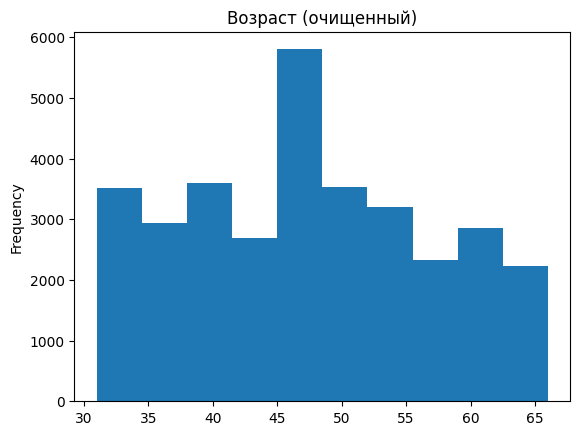

In [223]:
# Так как теперь наше среднее значение сохранено в столбце 'Средний возраст',
# то мы должны использовать .apply и .lambda функцию для замены значений, (а не .map)
df_copy[new_col] = df_copy.apply(lambda df: df['Средний возраст'] 
                            if df[target_col] <= p5 or df[target_col] >= p95 or pd.isna(df[target_col]) 
                            else df[target_col], axis=1
            )

# Проверяем, что получилось
df_copy[new_col].plot(kind='hist', title=new_col)